In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, RocCurveDisplay,  roc_auc_score, roc_curve
from sklearn.svm import SVC

In [197]:
df = pd.read_csv(r"C:\Users\Aaditya Adyot\Downloads\HR Analytics\data\Dataset cleaned.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11986,0.90,0.55,3,259,10,1,0,1,0,0,0,0,0,1,0,0,0,0,0
11987,0.74,0.95,5,266,10,0,0,1,0,0,0,0,0,1,0,0,0,0,0
11988,0.85,0.54,3,185,10,0,0,1,0,0,0,0,0,1,0,0,0,0,0
11989,0.33,0.65,3,172,10,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [198]:
df_copy= df

In [199]:
X= df_copy.drop('left', axis = 1)
y= df_copy['left']

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)

In [201]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [202]:
Logistics_reg = LogisticRegression()
Logistics_reg.fit(X_train, y_train)
pred_data= Logistics_reg.predict(X_test)

In [203]:
accuracy_score(y_test, pred_data)

0.8342597271349166

In [204]:
CM = confusion_matrix(y_test, pred_data)
CM

array([[3163,  133],
       [ 523,  139]], dtype=int64)

In [205]:
TP = CM[0][0]
FP = CM[0][1]
FN= CM[1][0]
TN = CM[1][1]
Accuracy = (TP+TN)/ (TP+ TN + FP + FN)
print('Accuracy is : ', Accuracy)
Recall = TP/ (TP+ FN)
print('Recall is : ', Recall)
Precision = TP/ (TP + FP)
print('Precision is : ', Precision)


Accuracy is :  0.8342597271349166
Recall is :  0.8581117742810634
Precision is :  0.9596480582524272


In [206]:
F1_score = 2 * (Recall * Precision)/(Recall + Precision)
print('F1 Score is : ', F1_score)

F1 Score is :  0.9060441134345458


In [207]:
auc= roc_auc_score(y_test, pred_data)
auc

0.5848089233860323

In [208]:
# ROC

In [209]:
TPR, FPR, Treshold = roc_curve(y_test, pred_data)

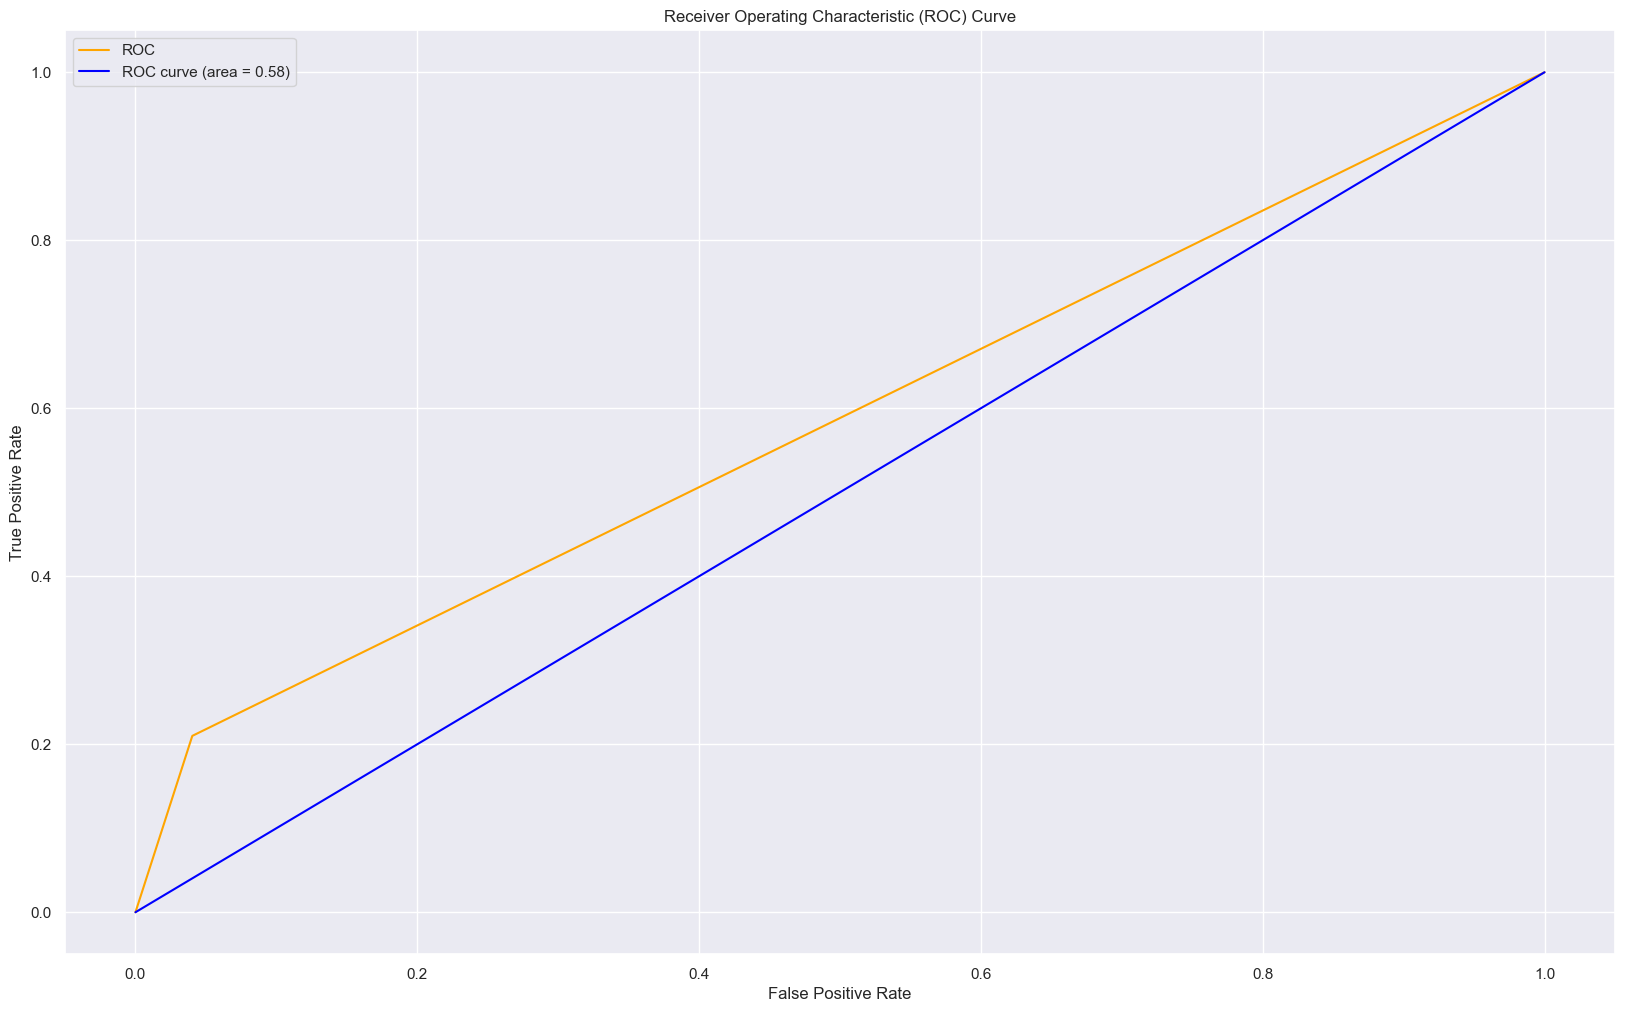

In [210]:
plt.plot(TPR, FPR, label= "ROC", color= 'orange')
plt.plot([0,1], [0,1], color= 'blue', label= 'ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [211]:
# Separate features and target variable
X = df_copy.drop('left', axis=1)  # Replace 'target_column_name' with the actual target column name
y = df_copy['left']

# Initialize a LogisticRegression model
model = LogisticRegression()

# Perform cross-validation with 5 folds
num_folds = 5
scores = cross_val_score(model, X, y, cv=num_folds, scoring='accuracy')

# Print cross-validation scores
for fold, score in enumerate(scores, start=1):
    print(f"Fold {fold}: Accuracy = {score:.4f}")

# Calculate and print the average cross-validation score
average_score = scores.mean()
print(f"Average Accuracy: {average_score:.4f}")

Fold 1: Accuracy = 0.8424
Fold 2: Accuracy = 0.8344
Fold 3: Accuracy = 0.8432
Fold 4: Accuracy = 0.8382
Fold 5: Accuracy = 0.7406
Average Accuracy: 0.8198


In [212]:
# Now lets drop some less correlated features and rebuild the model

In [213]:
df_copy.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [214]:
df_copy.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789,0.007216,0.005382,-0.002552,-0.021056,-0.007348,0.001883,0.005171,0.000171,0.004268,0.009064,-0.003426
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206,0.007091,-0.002885,-0.005448,0.007244,-0.001354,0.011106,0.002546,-0.004233,-0.022711,0.015876,0.008859
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544,0.003199,-0.001464,0.010077,0.006286,-0.025142,0.005729,-0.017232,-0.001777,-0.013473,0.006594,0.023235
average_montly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964,0.002727,0.001007,0.004159,0.001938,-0.005197,0.004211,-0.004935,-0.007987,-0.002890,0.001334,0.006321
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828,0.000369,-0.003233,-0.008380,0.006910,-0.018757,0.090071,0.010474,-0.004398,0.007233,-0.022955,-0.020051
Work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852,-0.003654,-0.009777,0.011793,-0.009178,-0.013463,0.005837,0.004181,0.003144,-0.000895,0.011613,-0.004268
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657,0.004224,-0.003324,-0.029016,0.005955,0.013567,-0.024417,0.000248,-0.003768,0.006154,0.006019,0.010000
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000,0.004832,-0.034334,0.025610,-0.001497,0.002446,0.098835,0.043833,-0.032326,0.004609,-0.026709,-0.026502
salary,0.007216,0.007091,0.003199,0.002727,0.000369,-0.003654,0.004224,0.004832,1.000000,0.005033,0.017519,-0.013297,0.009088,-0.081080,-0.000411,-0.003054,0.017441,0.019754,-0.008606
IT,0.005382,-0.002885,-0.001464,0.001007,-0.003233,-0.009777,-0.003324,-0.034334,0.005033,1.000000,-0.073779,-0.069566,-0.068377,-0.057822,-0.072586,-0.073326,-0.181086,-0.125958,-0.142826


In [215]:
## sns.pairplot(df_copy, kind='scatter', diag_kind='kde')

<Axes: >

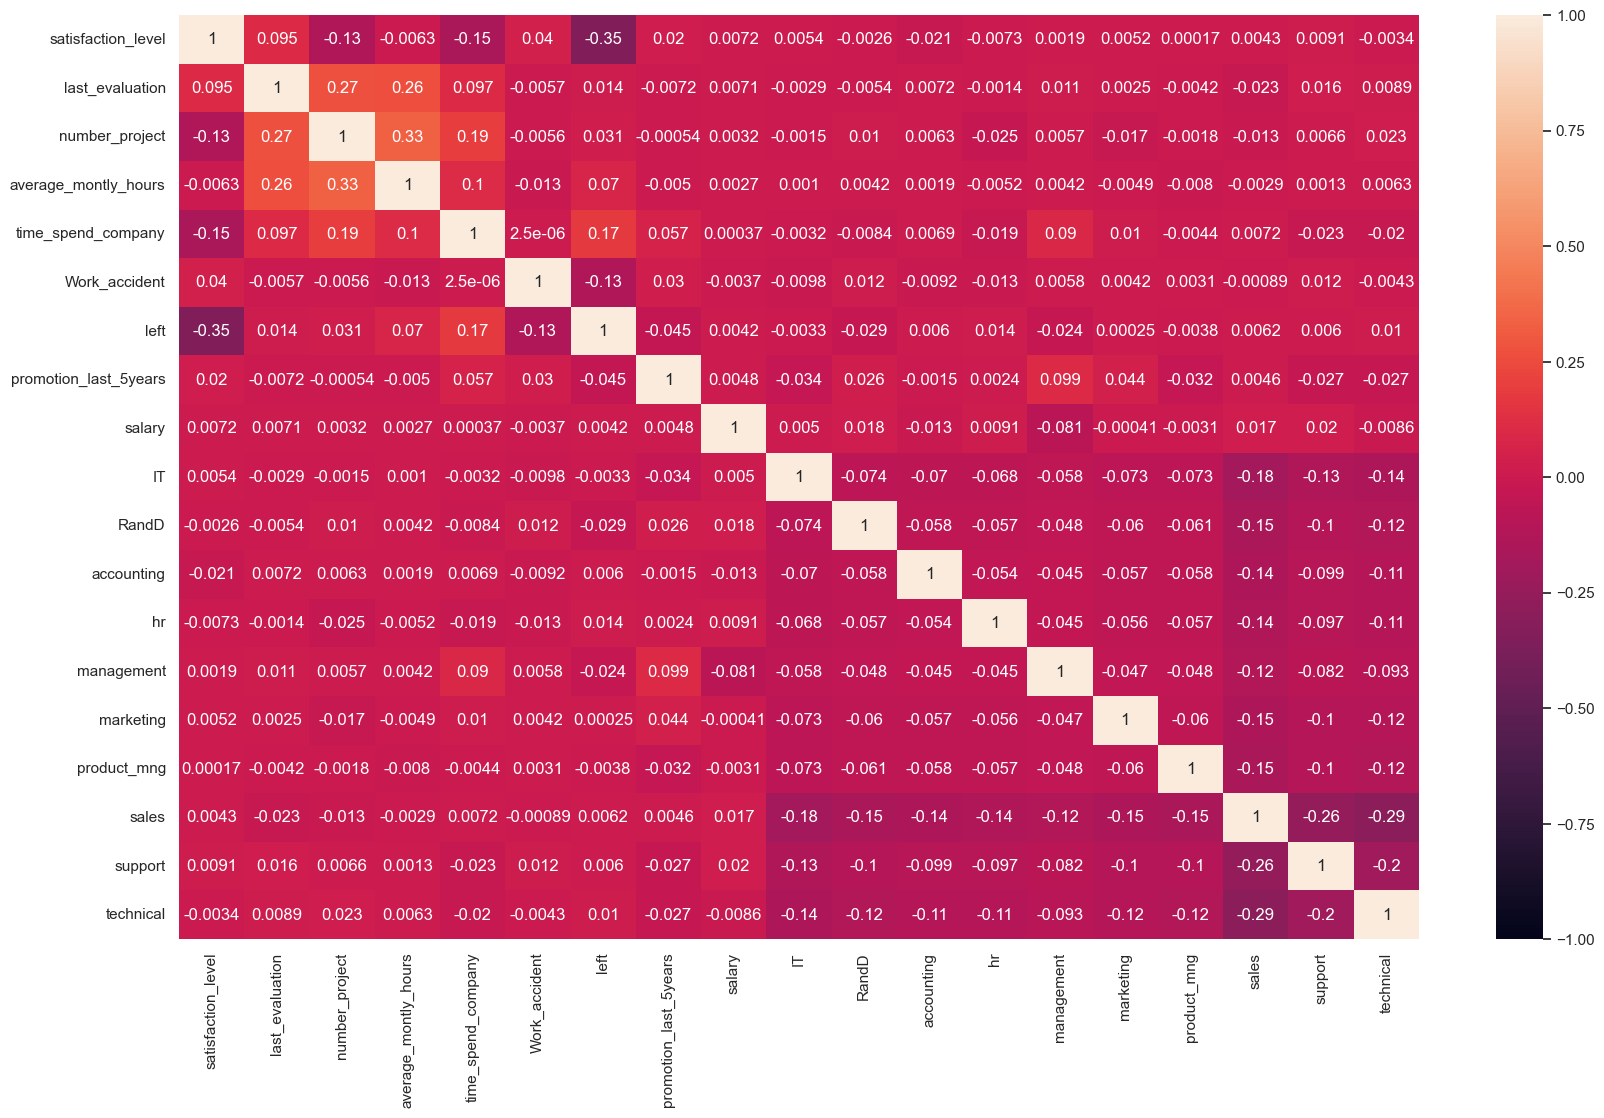

In [216]:
sns.set(rc= {'figure.figsize':(20,12)})
sns.heatmap(df_copy.corr(), annot= True, vmin=-1, vmax=1)

###### Seems like features that is 'salary', 'IT', 'RandD', 'accounting', 'hr', 'management', 'marketing', 'product_mng', 'sales', 'support','technical' are very less corelatted with left

In [217]:
df_copy.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary', 'IT', 'RandD', 'accounting', 'hr',
       'management', 'marketing', 'product_mng', 'sales', 'support',
       'technical'],
      dtype='object')

In [218]:
df_copy.drop(['IT', 'RandD', 'accounting', 'hr',
       'management', 'marketing', 'product_mng', 'sales', 'support',
       'technical'], axis= 1, inplace = True)

In [219]:
df_copy.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary'],
      dtype='object')

In [220]:
df_copy.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,1,0,1
1,0.80,0.86,5,262,6,0,1,0,2
2,0.11,0.88,7,272,4,0,1,0,2
3,0.72,0.87,5,223,5,0,1,0,1
4,0.37,0.52,2,159,3,0,1,0,1


In [221]:
df_copy.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789,0.007216
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206,0.007091
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544,0.003199
average_montly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964,0.002727
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828,0.000369
Work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852,-0.003654
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657,0.004224
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000,0.004832
salary,0.007216,0.007091,0.003199,0.002727,0.000369,-0.003654,0.004224,0.004832,1.000000


0.831733198585144
[[3158  138]
 [ 528  134]]
Accuracy is :  0.831733198585144
Recall is :  0.8567552902875746
Precision is :  0.9581310679611651
F1 Score is :  0.9046118590661703
auc is : 0.580273993195084


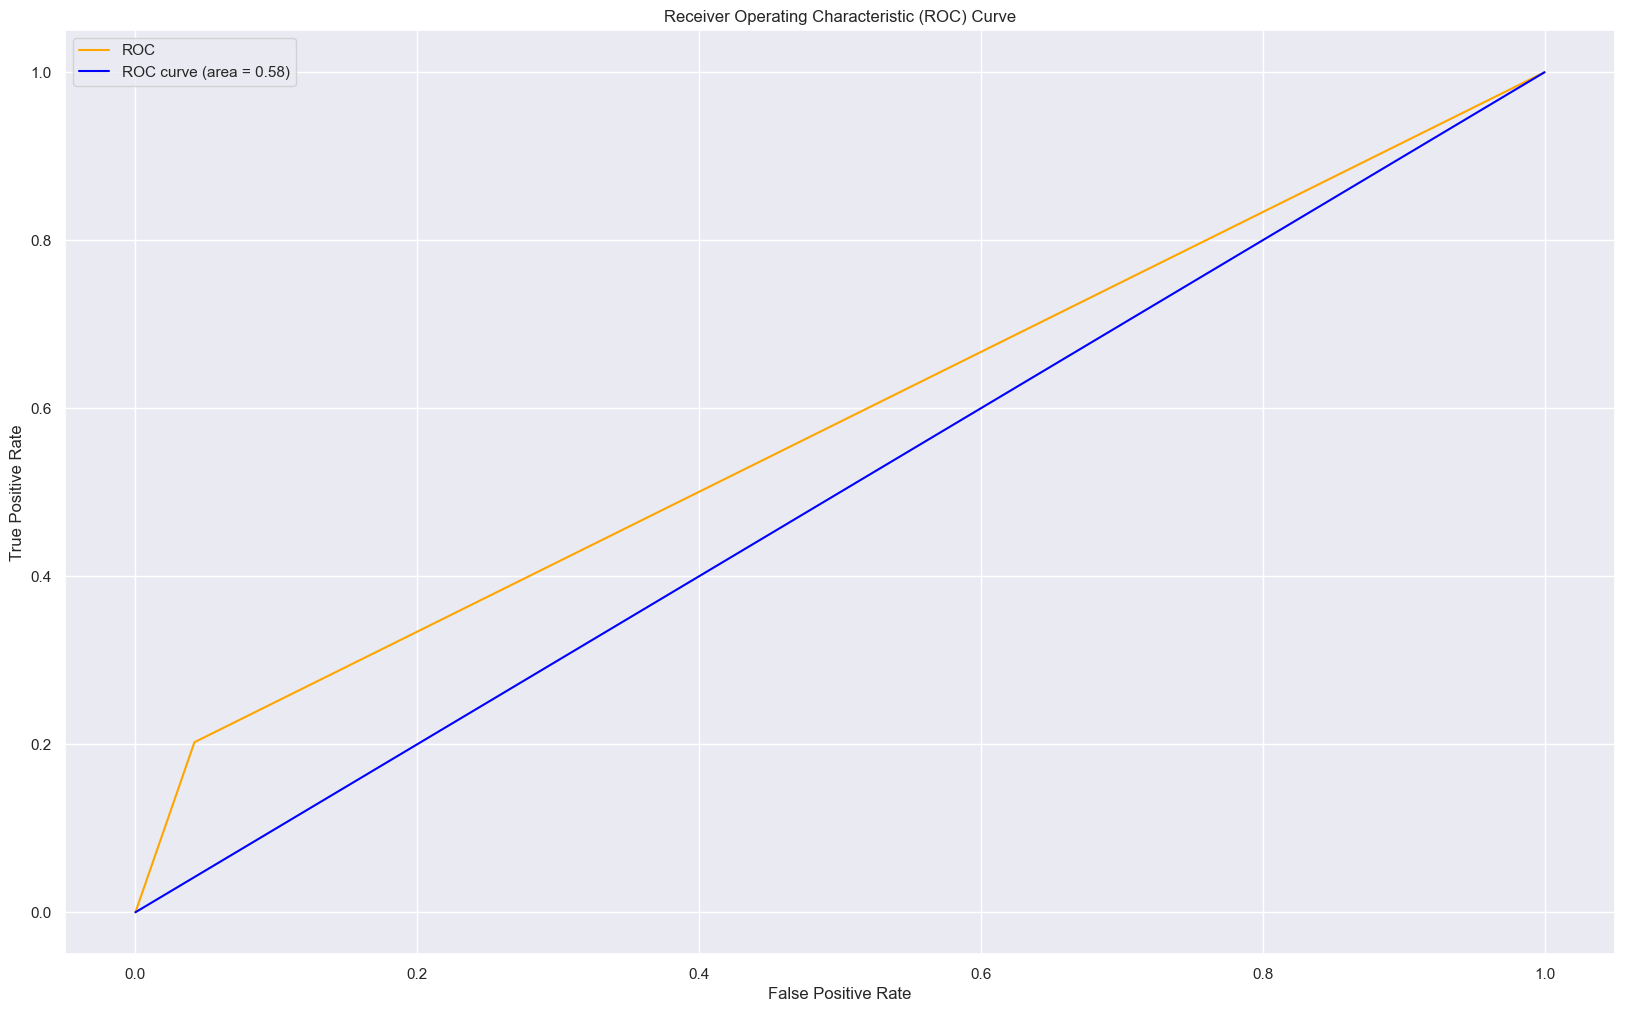

In [222]:
X= df_copy.drop('left', axis = 1)
y= df_copy['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
Logistics_reg = LogisticRegression()
Logistics_reg.fit(X_train, y_train)
pred_data= Logistics_reg.predict(X_test)
print(accuracy_score(y_test, pred_data))
CM = confusion_matrix(y_test, pred_data)
print(CM)
TP = CM[0][0]
FP = CM[0][1]
FN= CM[1][0]
TN = CM[1][1]
Accuracy = (TP+TN)/ (TP+ TN + FP + FN)
print('Accuracy is : ', Accuracy)
Recall = TP/ (TP+ FN)
print('Recall is : ', Recall)
Precision = TP/ (TP + FP)
print('Precision is : ', Precision)
F1_score = 2 * (Recall * Precision)/(Recall + Precision)
print('F1 Score is : ', F1_score)
auc= roc_auc_score(y_test, pred_data)
print("auc is :", auc)
# -------- ROC
TPR, FPR, Treshold = roc_curve(y_test, pred_data)
plt.plot(TPR, FPR, label= "ROC", color= 'orange')
plt.plot([0,1], [0,1], color= 'blue', label= 'ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [223]:
# Separate features and target variable
X = df_copy.drop('left', axis=1)  # Replace 'target_column_name' with the actual target column name
y = df_copy['left']

# Initialize a LogisticRegression model
model = LogisticRegression()

# Perform cross-validation with 5 folds
num_folds = 5
scores = cross_val_score(model, X, y, cv=num_folds, scoring='accuracy')

# Print cross-validation scores
for fold, score in enumerate(scores, start=1):
    print(f"Fold {fold}: Accuracy = {score:.4f}")

# Calculate and print the average cross-validation score
average_score = scores.mean()
print(f"Average Accuracy: {average_score:.4f}")

Fold 1: Accuracy = 0.8454
Fold 2: Accuracy = 0.8340
Fold 3: Accuracy = 0.8407
Fold 4: Accuracy = 0.8428
Fold 5: Accuracy = 0.7440
Average Accuracy: 0.8214


In [224]:
# Now lets remove some more features which are less co-related

In [225]:
df_copy.drop(['average_montly_hours', 'salary', 'last_evaluation'], axis= 1, inplace= True)

In [226]:
df_copy.corr()

,satisfaction_level,number_project,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,-0.133246,-0.152915,0.039940,-0.350558,0.019789
number_project,-0.133246,1.000000,0.188837,-0.005612,0.030928,-0.000544
time_spend_company,-0.152915,0.188837,1.000000,0.000003,0.173295,0.056828
Work_accident,0.039940,-0.005612,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.030928,0.173295,-0.125436,1.000000,-0.044657
promotion_last_5years,0.019789,-0.000544,0.056828,0.029852,-0.044657,1.000000


0.825922182920667
[[3157  139]
 [ 550  112]]
Accuracy is :  0.825922182920667
Recall is :  0.8516320474777448
Precision is :  0.9578276699029126
F1 Score is :  0.9016135941739254
auc is : 0.563505979966562


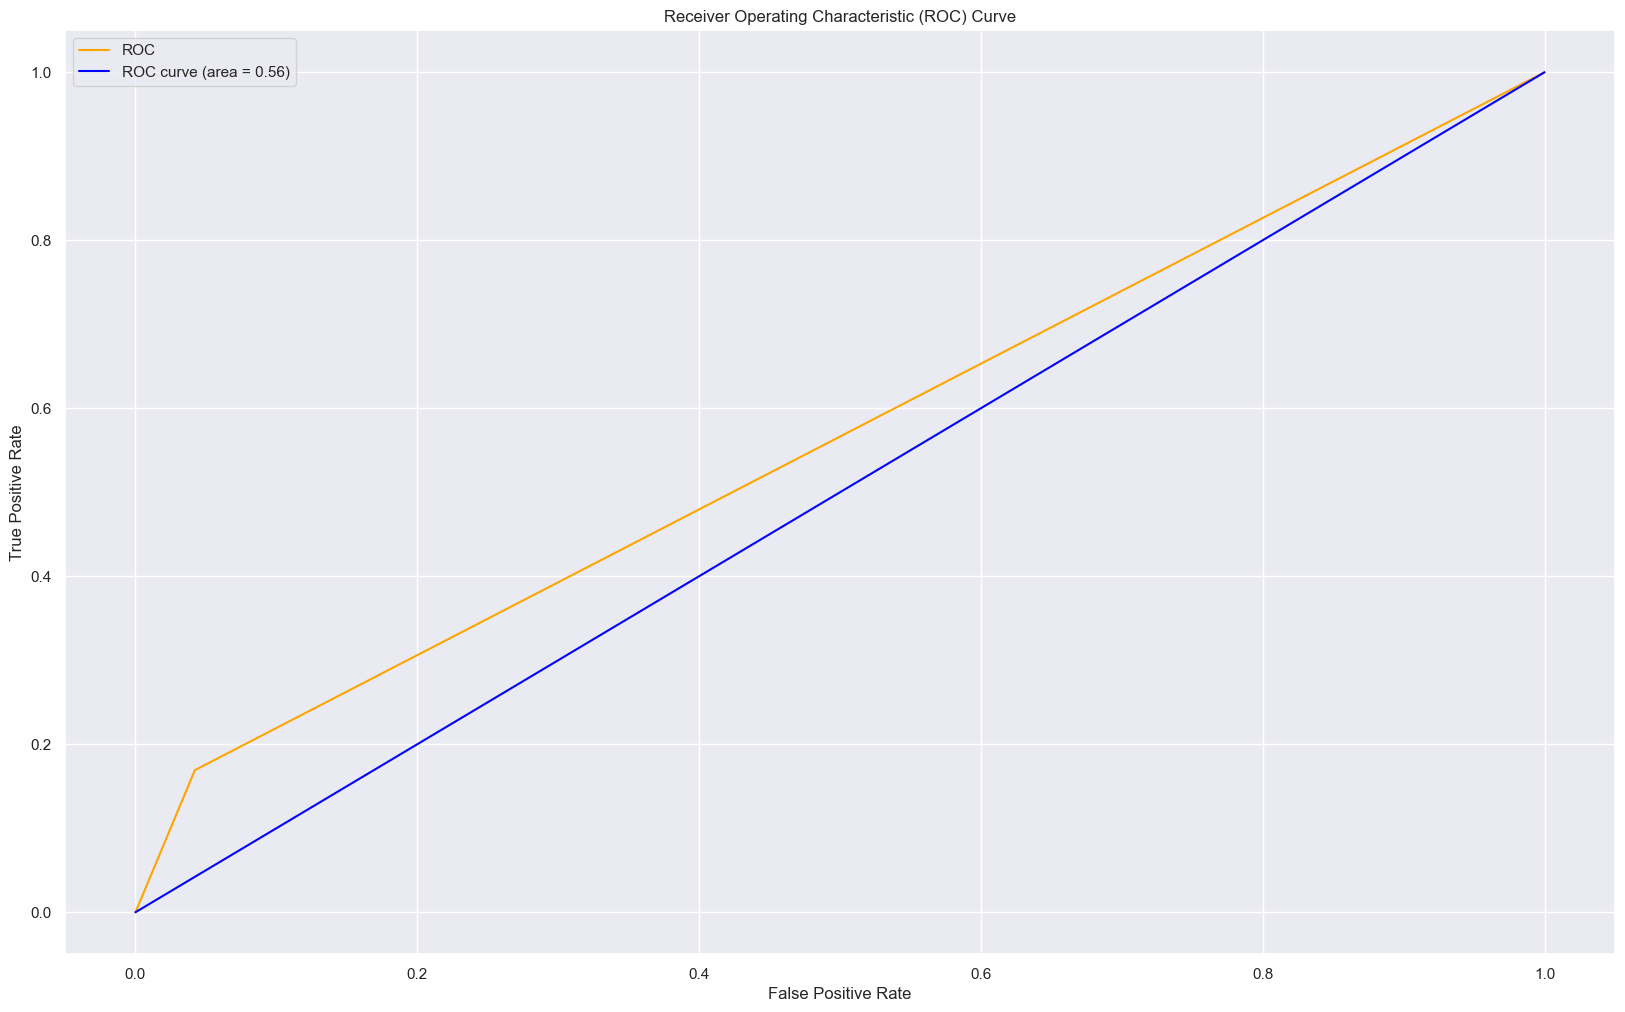

In [227]:
X= df_copy.drop('left', axis = 1)
y= df_copy['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
Logistics_reg = LogisticRegression()
Logistics_reg.fit(X_train, y_train)
pred_data= Logistics_reg.predict(X_test)
print(accuracy_score(y_test, pred_data))
CM = confusion_matrix(y_test, pred_data)
print(CM)
TP = CM[0][0]
FP = CM[0][1]
FN= CM[1][0]
TN = CM[1][1]
Accuracy = (TP+TN)/ (TP+ TN + FP + FN)
print('Accuracy is : ', Accuracy)
Recall = TP/ (TP+ FN)
print('Recall is : ', Recall)
Precision = TP/ (TP + FP)
print('Precision is : ', Precision)
F1_score = 2 * (Recall * Precision)/(Recall + Precision)
print('F1 Score is : ', F1_score)
auc= roc_auc_score(y_test, pred_data)
print("auc is :", auc)
# -------- ROC
TPR, FPR, Treshold = roc_curve(y_test, pred_data)
plt.plot(TPR, FPR, label= "ROC", color= 'orange')
plt.plot([0,1], [0,1], color= 'blue', label= 'ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [228]:
# Separate features and target variable
X = df_copy.drop('left', axis=1)  # Replace 'target_column_name' with the actual target column name
y = df_copy['left']

# Initialize a LogisticRegression model
model = LogisticRegression()

# Perform cross-validation with 5 folds
num_folds = 5
scores = cross_val_score(model, X, y, cv=num_folds, scoring='accuracy')

# Print cross-validation scores
for fold, score in enumerate(scores, start=1):
    print(f"Fold {fold}: Accuracy = {score:.4f}")

# Calculate and print the average cross-validation score
average_score = scores.mean()
print(f"Average Accuracy: {average_score:.4f}")

Fold 1: Accuracy = 0.8412
Fold 2: Accuracy = 0.8286
Fold 3: Accuracy = 0.8369
Fold 4: Accuracy = 0.8332
Fold 5: Accuracy = 0.7285
Average Accuracy: 0.8137


# Observation:

1. Logistics Regression Model performs well with the features like 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary'.

# SVM --- > SVC Model

In [229]:
df = pd.read_csv(r"C:\Users\Aaditya Adyot\Downloads\HR Analytics\data\Dataset cleaned.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11986,0.90,0.55,3,259,10,1,0,1,0,0,0,0,0,1,0,0,0,0,0
11987,0.74,0.95,5,266,10,0,0,1,0,0,0,0,0,1,0,0,0,0,0
11988,0.85,0.54,3,185,10,0,0,1,0,0,0,0,0,1,0,0,0,0,0
11989,0.33,0.65,3,172,10,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [230]:
df_copy = df

In [231]:
df_copy.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0


0.9562910560889338
[[3206   90]
 [  83  579]]
Accuracy is :  0.9562910560889338
Recall is :  0.9747643660687139
Precision is :  0.9726941747572816
F1 Score is :  0.9737281700835231
auc is : 0.923658265626375


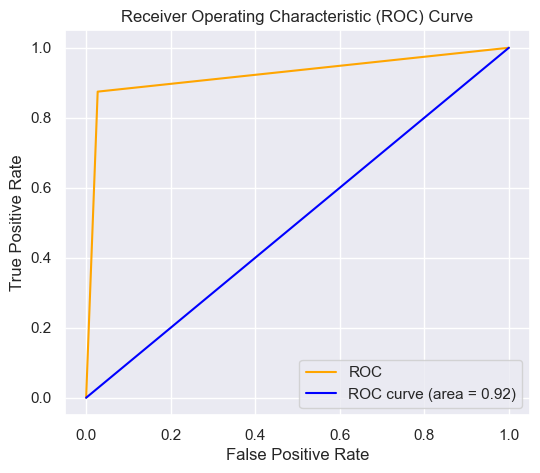

In [232]:
X= df_copy.drop('left', axis = 1)
y= df_copy['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
svc = SVC()
svc.fit(X_train, y_train)
pred_data= svc.predict(X_test)
print(accuracy_score(y_test, pred_data))
CM = confusion_matrix(y_test, pred_data)
print(CM)
TP = CM[0][0]
FP = CM[0][1]
FN= CM[1][0]
TN = CM[1][1]
Accuracy = (TP+TN)/ (TP+ TN + FP + FN)
print('Accuracy is : ', Accuracy)
Recall = TP/ (TP+ FN)
print('Recall is : ', Recall)
Precision = TP/ (TP + FP)
print('Precision is : ', Precision)
F1_score = 2 * (Recall * Precision)/(Recall + Precision)
print('F1 Score is : ', F1_score)
auc= roc_auc_score(y_test, pred_data)
print("auc is :", auc)
# -------- ROC
TPR, FPR, Treshold = roc_curve(y_test, pred_data)
plt.figure(figsize= (6,5))
plt.plot(TPR, FPR, label= "ROC", color= 'orange')
plt.plot([0,1], [0,1], color= 'blue', label= 'ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [233]:
# Separate features and target variable
X = df_copy.drop('left', axis=1)  # Replace 'target_column_name' with the actual target column name
y = df_copy['left']

# Initialize a SVC model
model = SVC()

# Perform cross-validation with 5 folds
num_folds = 5
scores = cross_val_score(model, X, y, cv=num_folds, scoring='accuracy')

# Print cross-validation scores
for fold, score in enumerate(scores, start=1):
    print(f"Fold {fold}: Accuracy = {score:.4f}")

# Calculate and print the average cross-validation score
average_score = scores.mean()
print(f"Average Accuracy: {average_score:.4f}")

Fold 1: Accuracy = 0.8337
Fold 2: Accuracy = 0.8340
Fold 3: Accuracy = 0.8340
Fold 4: Accuracy = 0.8340
Fold 5: Accuracy = 0.8340
Average Accuracy: 0.8340


##### Seems like features that is 'salary', 'IT', 'RandD', 'accounting', 'hr', 'management', 'marketing', 'product_mng', 'sales', 'support','technical' are very less corelatted with left

In [234]:
df_copy.drop(['IT', 'RandD', 'accounting', 'hr',
       'management', 'marketing', 'product_mng', 'sales', 'support',
       'technical'], axis= 1, inplace = True)

In [235]:
df_copy.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary'],
      dtype='object')

0.9699343102577059
[[3243   53]
 [  66  596]]
Accuracy is :  0.9699343102577059
Recall is :  0.9800543970988214
Precision is :  0.9839199029126213
F1 Score is :  0.9819833459500378
auc is : 0.9421110088581234


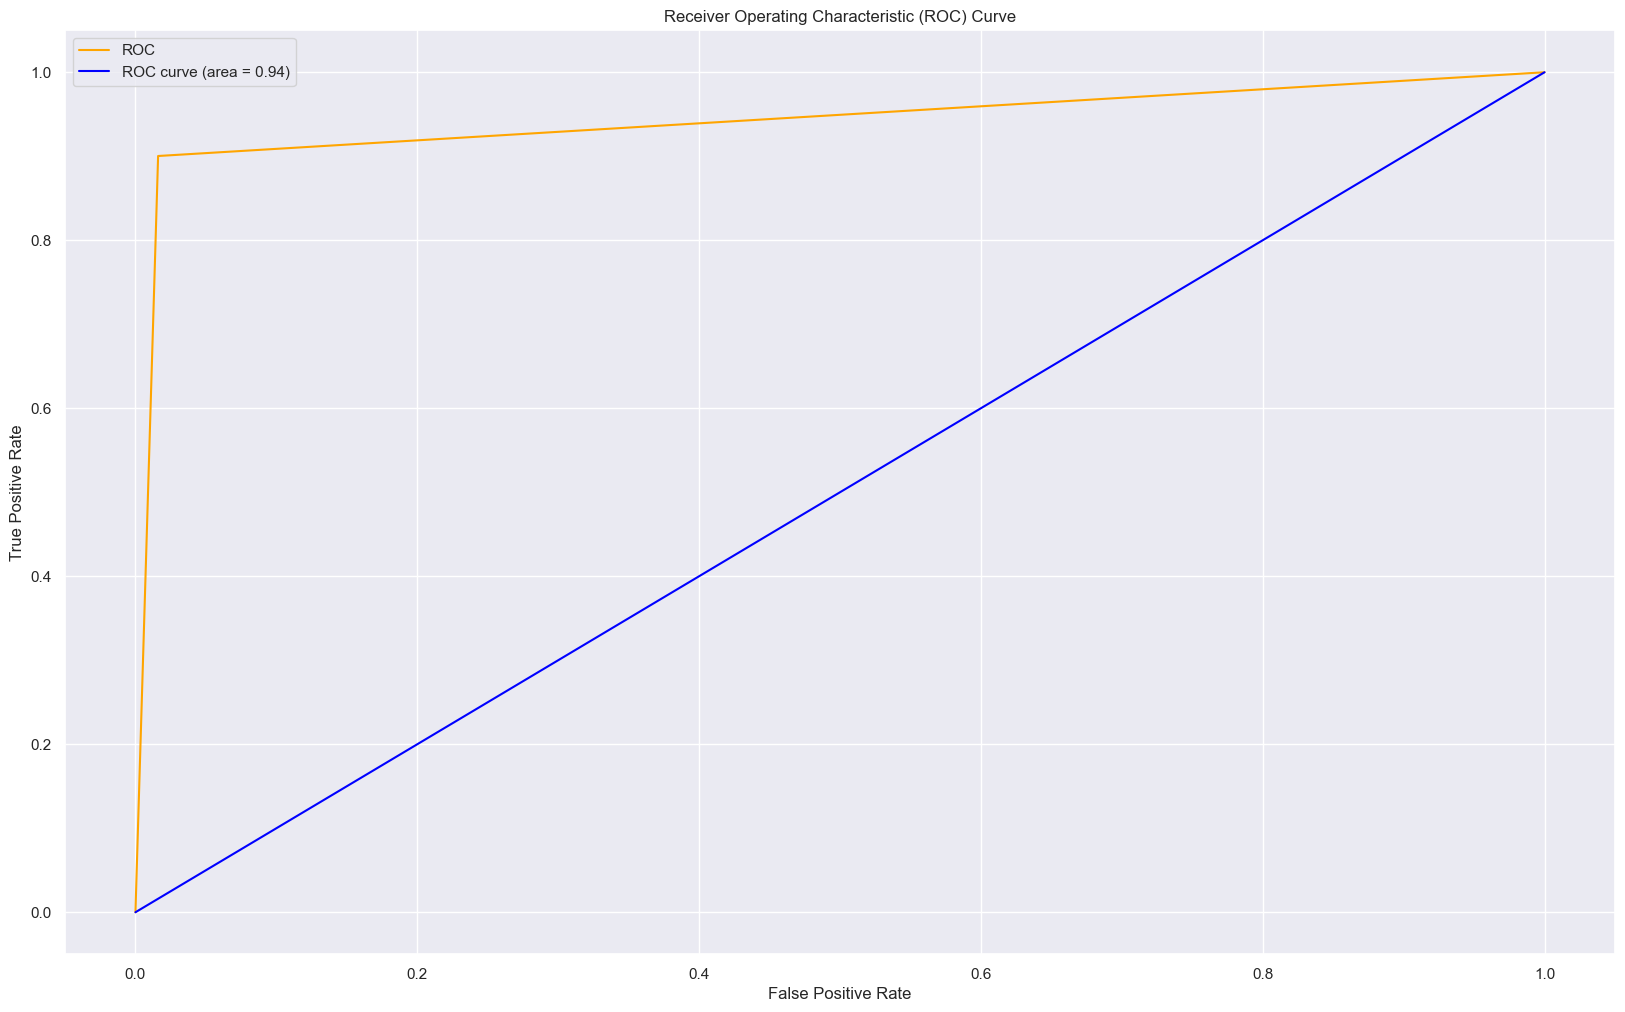

In [236]:
X= df_copy.drop('left', axis = 1)
y= df_copy['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
svc = SVC()
svc.fit(X_train, y_train)
pred_data= svc.predict(X_test)
print(accuracy_score(y_test, pred_data))
CM = confusion_matrix(y_test, pred_data)
print(CM)
TP = CM[0][0]
FP = CM[0][1]
FN= CM[1][0]
TN = CM[1][1]
Accuracy = (TP+TN)/ (TP+ TN + FP + FN)
print('Accuracy is : ', Accuracy)
Recall = TP/ (TP+ FN)
print('Recall is : ', Recall)
Precision = TP/ (TP + FP)
print('Precision is : ', Precision)
F1_score = 2 * (Recall * Precision)/(Recall + Precision)
print('F1 Score is : ', F1_score)
auc= roc_auc_score(y_test, pred_data)
print("auc is :", auc)
# -------- ROC
TPR, FPR, Treshold = roc_curve(y_test, pred_data)
plt.plot(TPR, FPR, label= "ROC", color= 'orange')
plt.plot([0,1], [0,1], color= 'blue', label= 'ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [237]:
# Separate features and target variable
X = df_copy.drop('left', axis=1)  # Replace 'target_column_name' with the actual target column name
y = df_copy['left']

# Initialize a SVC model
model = SVC()

# Perform cross-validation with 5 folds
num_folds = 5
scores = cross_val_score(model, X, y, cv=num_folds, scoring='accuracy')

# Print cross-validation scores
for fold, score in enumerate(scores, start=1):
    print(f"Fold {fold}: Accuracy = {score:.4f}")

# Calculate and print the average cross-validation score
average_score = scores.mean()
print(f"Average Accuracy: {average_score:.4f}")

Fold 1: Accuracy = 0.8337
Fold 2: Accuracy = 0.8340
Fold 3: Accuracy = 0.8340
Fold 4: Accuracy = 0.8340
Fold 5: Accuracy = 0.8340
Average Accuracy: 0.8340


# Now lets remove some more features which are less co-related


In [238]:
df_copy.drop(['average_montly_hours', 'salary', 'last_evaluation'], axis= 1, inplace= True)

0.9562910560889338
[[3191  105]
 [  68  594]]
Accuracy is :  0.9562910560889338
Recall is :  0.9791347038969009
Precision is :  0.9681432038834952
F1 Score is :  0.9736079328756674
auc is : 0.9327120853254335


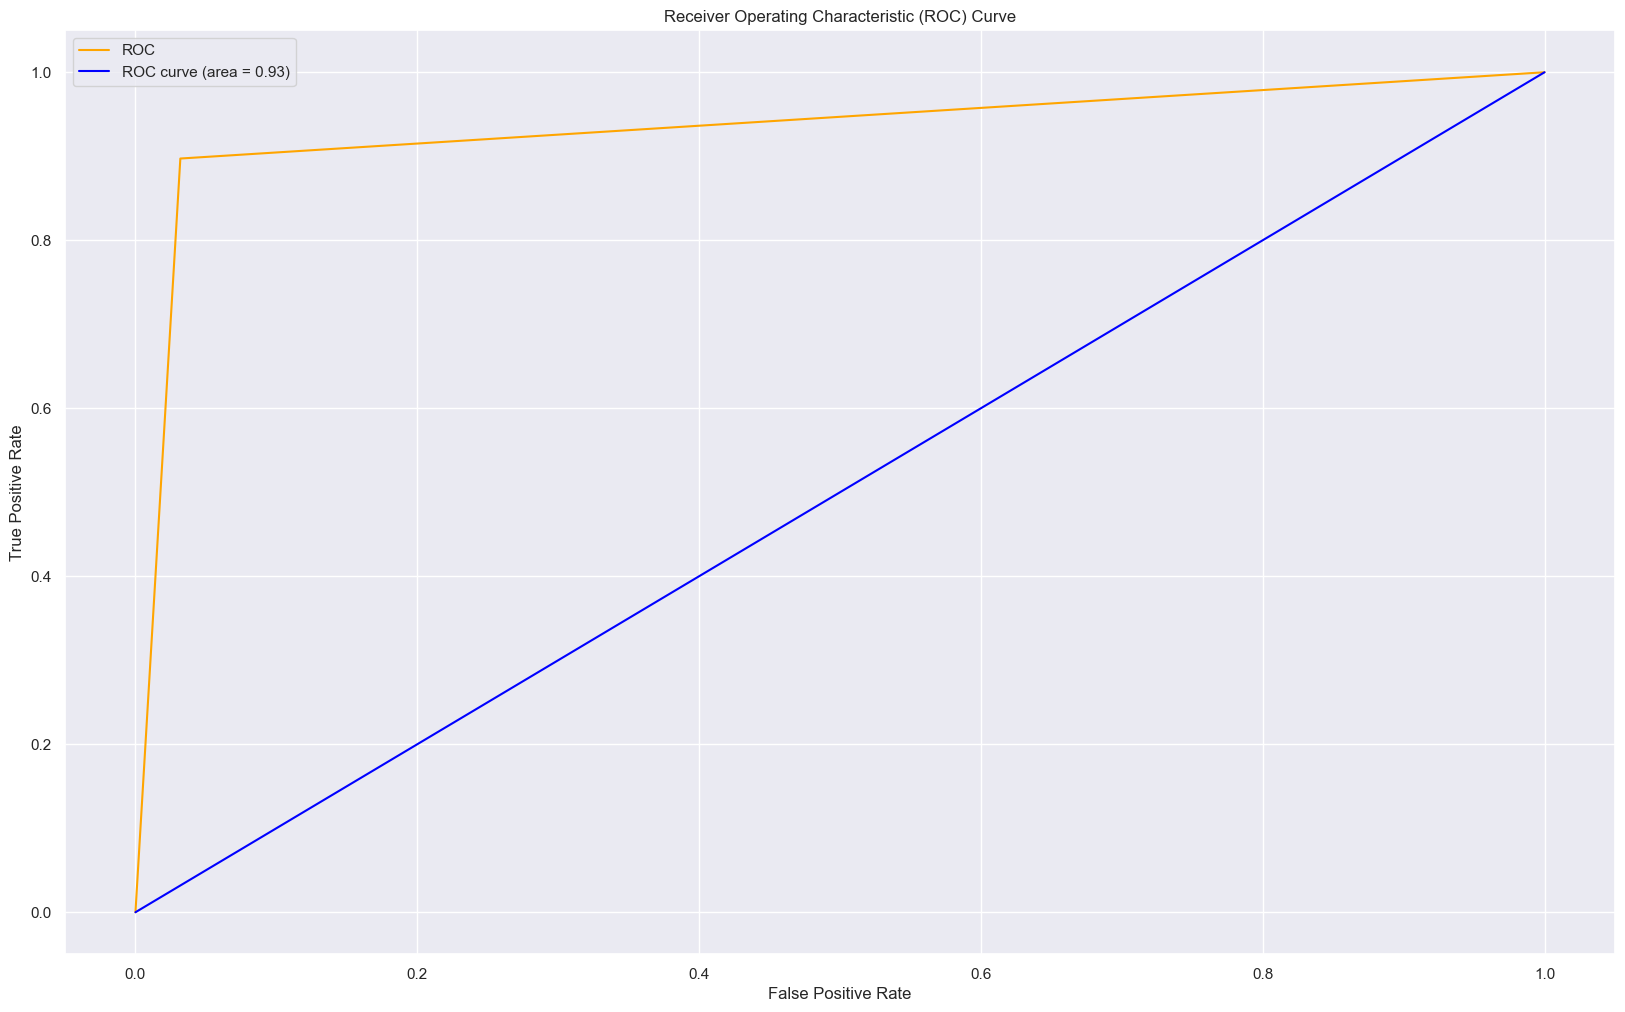

In [239]:
X= df_copy.drop('left', axis = 1)
y= df_copy['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
svc = SVC()
svc.fit(X_train, y_train)
pred_data= svc.predict(X_test)
print(accuracy_score(y_test, pred_data))
CM = confusion_matrix(y_test, pred_data)
print(CM)
TP = CM[0][0]
FP = CM[0][1]
FN= CM[1][0]
TN = CM[1][1]
Accuracy = (TP+TN)/ (TP+ TN + FP + FN)
print('Accuracy is : ', Accuracy)
Recall = TP/ (TP+ FN)
print('Recall is : ', Recall)
Precision = TP/ (TP + FP)
print('Precision is : ', Precision)
F1_score = 2 * (Recall * Precision)/(Recall + Precision)
print('F1 Score is : ', F1_score)
auc= roc_auc_score(y_test, pred_data)
print("auc is :", auc)
# -------- ROC
TPR, FPR, Treshold = roc_curve(y_test, pred_data)
plt.plot(TPR, FPR, label= "ROC", color= 'orange')
plt.plot([0,1], [0,1], color= 'blue', label= 'ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [240]:
# Separate features and target variable
X = df_copy.drop('left', axis=1)  # Replace 'target_column_name' with the actual target column name
y = df_copy['left']

# Initialize a SVC model
model = SVC()

# Perform cross-validation with 5 folds
num_folds = 5
scores = cross_val_score(model, X, y, cv=num_folds, scoring='accuracy')

# Print cross-validation scores
for fold, score in enumerate(scores, start=1):
    print(f"Fold {fold}: Accuracy = {score:.4f}")

# Calculate and print the average cross-validation score
average_score = scores.mean()
print(f"Average Accuracy: {average_score:.4f}")

Fold 1: Accuracy = 0.9321
Fold 2: Accuracy = 0.9216
Fold 3: Accuracy = 0.9199
Fold 4: Accuracy = 0.9220
Fold 5: Accuracy = 0.9366
Average Accuracy: 0.9264


# Observation:

1. SVC Model performs well with the features like 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary'.